In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

## Load the MNIST dataset from Keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Training samples:", len(X_train))
print("Test samples", len(X_test))

print("Shape of individual images:", X_train[0].shape)

Training samples: 60000
Test samples 10000
Shape of individual images: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

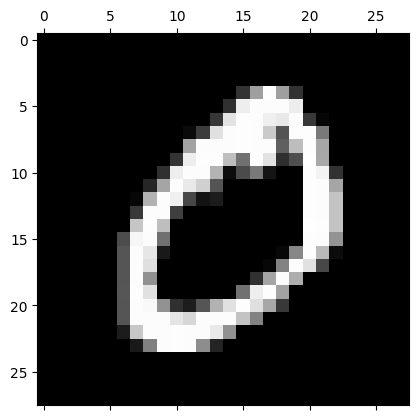

In [5]:
plt.matshow(X_train[1], cmap='gray')

In [6]:
y_train[1]

0

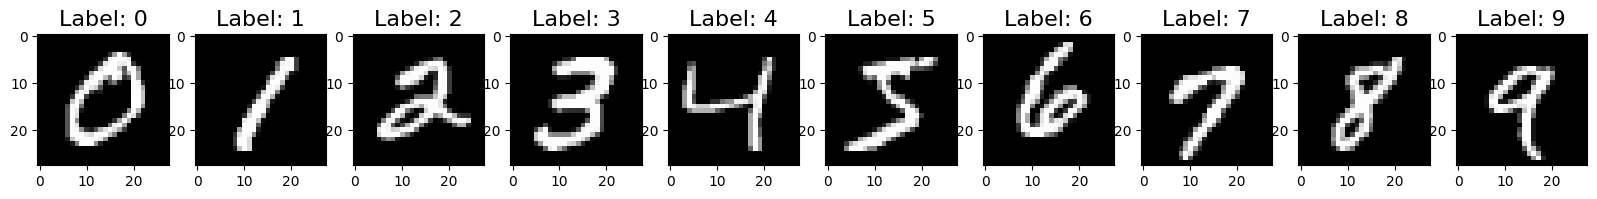

In [7]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize = (20,20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize = 16)

In [8]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the pixel values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjustments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
for r in X_train[2]:
    for c in r:
        if c > 0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D Arrays
In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we transform the data into a format that the neural network can work with. This is because the underlying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.


In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [12]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neural Network using Keras

We will initially use a simlpe netowrk that only has an input layer and an output layer. The input layer will have 784 neurons (28x28 pixels in each image) and the output layer will have 10 neurons as we want to predict a digit, 0 - 9.

In [15]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='softmax')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4688 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9258


In [ ]:
predictions = model.predict(test_dataset)
